## Comparison

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/Umap.jpg
" width="1000">


In [1]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species",width=1000,title='Scatter Matrix')
fig.show()


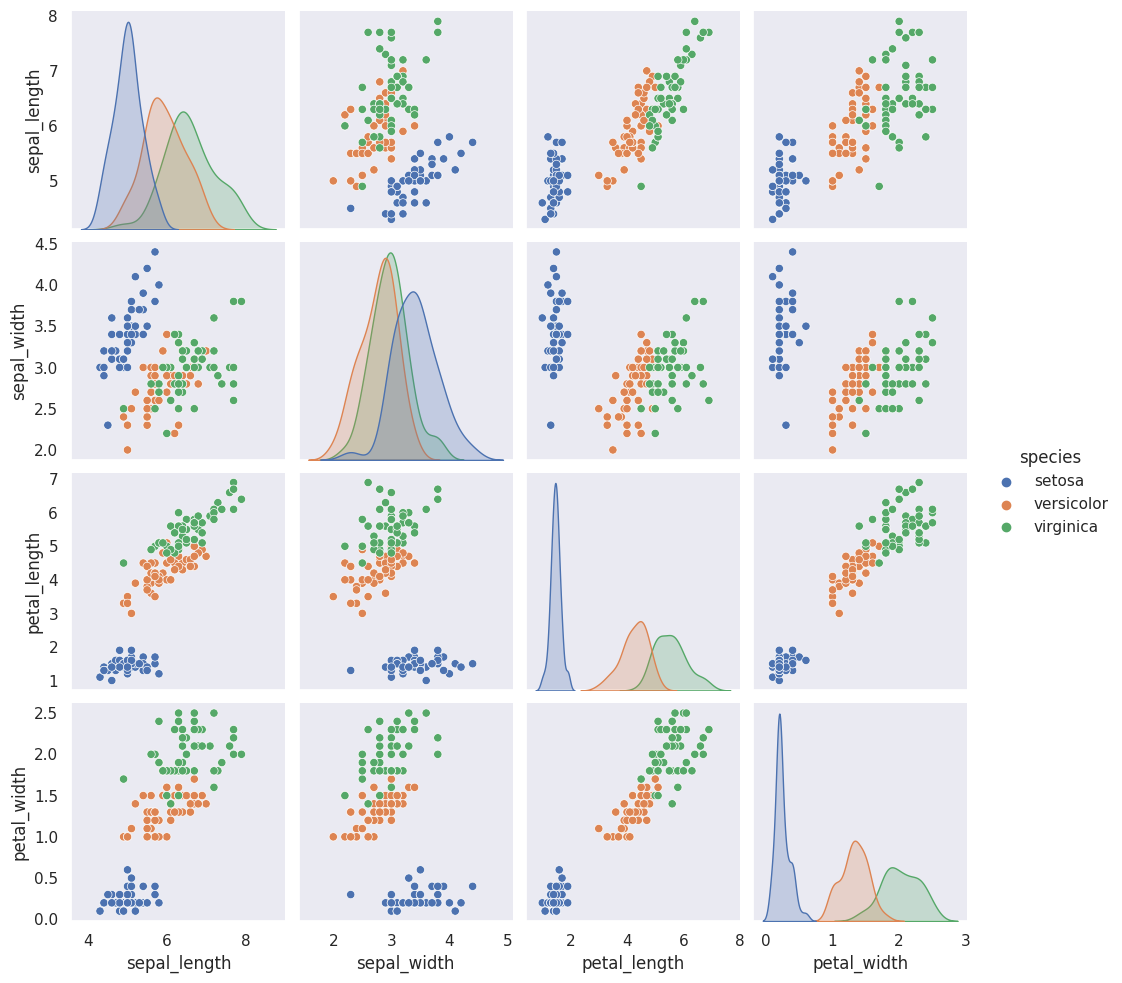

In [ ]:
import seaborn as sns
sns.pairplot(df.iloc[:,:-1],hue='species')

## Project data into 2D with PCA

In [2]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = df.iloc[:,:-2]

pca = PCA(n_components=2)
components = pca.fit_transform(features)

fig = px.scatter(components, x=0, y=1, color=df['species'],labels={'0': 'PC 1', '1': 'PC 2'},width=1000,title='PCA iris')
fig.show()

## Project data into 3D with PCA

In [3]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = df.iloc[:,:-2]

pca = PCA(n_components=3)
components = pca.fit_transform(features)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Project data into 2D with t-SNE:  t-distributed Stochastic Neighbor Embedding

In [4]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [5]:
features = df.iloc[:,:-2]

tsne = TSNE(n_components=2, random_state=667)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species,width=1000,title='t-SNE iris')
fig.show()

## Project data into 3D with t-SNE

In [6]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.iloc[:,:-2]

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species,
)
fig.update_traces(marker_size=8)
fig.show()

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/umapslap.jpg
" width="800">

In [7]:
!pip install umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## UMAP(Uniform Manifold Approximation)
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE.
According to the authors of UMAP, "The UMAP algorithm is competitive with t-SNE for visualization quality, and arguably preserves more of the global structure with superior run time performance. Furthermore, UMAP has no computational restrictions on embedding dimension, making it viable as a general purpose dimension reduction technique for machine learning."

Four things to note here:

- UMAP achieves comparable visualization performance with t-SNE.
- UMAP preserves more of the global structure. While the distance between the clusters formed in t-SNE does not have significant meaning, in UMAP the distance between clusters matters.
- UMAP is fast and can scale to Big Data.
- UMAP is not restricted for visualization-only purposes like t-SNE. It can serve as a general-purpose Dimensionality Reduction algorithm.
**Basically, UMAP is the t-SNE killer for most practical cases.*

## Projections data into 2D with UMAP



In [8]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()
features = df.iloc[:, :-2]

umap_2d = UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(proj_2d, x=0, y=1,color=df.species,width=1000,title='UMAP iris')
fig_2d.show()


## Projections data into 3D with UMAP

In [9]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()
features = df.iloc[:, :-2]

umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(features)
fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2,color=df.species, labels={'color': 'species'})
fig_3d.update_traces(marker_size=5)

fig_3d.show()

## MNIST Dataset

MNIST is a traditional clustering data set consisting of a set of 28x28 greyscale images of handwritten digits.  We will do the traditional thing with this data a treat the greyscale images as a 28x28 = 784 long vector and compute Euclidean distance between these vectors. 

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/mnist.png
" width="800">

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from umap import UMAP

In [11]:
%%time
from sklearn.datasets import load_digits
mnist = load_digits()

CPU times: user 86.7 ms, sys: 7.12 ms, total: 93.8 ms
Wall time: 161 ms


In [13]:
data = mnist.data
labels = mnist.target
data.shape

(1797, 64)

In [14]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms.  This isn't really a competitor but instead should be thought of as a strawman.  Given that other algorithms initialize with these values one would hope that they can do better.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
u_pca = pca.fit_transform(data)

fig_2d = px.scatter(u_pca, u_pca[:,0], u_pca[:,1],color=labels, labels={'color': 'digits'},width=1000,title='PCA-2D Plot')
fig_2d.show()

In [16]:
pca = PCA(n_components=3)
u_pca = pca.fit_transform(data)

fig_3d = px.scatter_3d(u_pca,  u_pca[:,0], u_pca[:,1],u_pca[:,2],color=labels, labels={'color': 'digits'},title='PCA-3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

### T-SNE

In [17]:
fit_tsne = TSNE(n_components=2, random_state=667)
u_tsne = fit_tsne.fit_transform(data)

In [18]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=labels
output

,x,y,labels
0,-2.128930,56.479946,0
1,10.417849,-11.656362,1
2,-13.404267,-18.673307,2
3,-35.471909,6.198559,3
4,40.989685,-7.206041,4
...,...,...,...
1792,-23.633842,17.298227,9
1793,3.796404,50.504169,0
1794,-5.768115,-10.661956,8
1795,-20.993031,15.160077,9


In [19]:
fig_2d = px.scatter(u_tsne,u_tsne[:,0], u_tsne[:,1],color=labels, labels={'color': 'digits'},width=1000)
fig_2d.show()

In [20]:
fit_tsne = TSNE(n_components=3, random_state=667)
u_tsne = fit_tsne.fit_transform(data)

fig_3d = px.scatter_3d(u_tsne,  u_tsne[:,0], u_tsne[:,1],u_tsne[:,2],color=labels, labels={'color': 'digits'},title='t-sne-3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

### UMAP

In [21]:
fit = UMAP(n_components=2,n_neighbors=15, random_state=667, metric='euclidean')
u_umap = fit.fit_transform(data)

In [22]:
output = pd.DataFrame(u_umap, columns=('x','y'))
output['labels']=labels
output

,x,y,labels
0,17.378183,11.138388,0
1,0.225648,12.960146,1
2,1.278049,10.372312,2
3,1.710016,6.495283,3
4,5.259111,19.444433,4
...,...,...,...
1792,-0.721742,4.000575,9
1793,16.479523,10.794011,0
1794,-0.305389,10.271355,8
1795,-0.810128,4.849509,9


In [23]:
fig_2d = px.scatter(u_umap,u_umap[:,0], u_umap[:,1],color=labels, labels={'color': 'digits'},width=1000)
fig_2d.show()

In [24]:
fit = UMAP(n_components=3,n_neighbors=15, random_state=667, metric='euclidean')
u_umap = fit.fit_transform(data)

fig_3d = px.scatter_3d(u_umap,  u_umap[:,0], u_umap[:,1],u_umap[:,2],color=labels, labels={'color': 'digits'},title='t-sne-3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

### Isomap

In [ ]:
fit_isomap = Isomap(n_components=2)
u_isomap = fit_isomap.fit_transform(data)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
output = pd.DataFrame(u_isomap, columns=('x','y'))
output['labels']=labels
output

,x,y,labels
0,165.573044,30.046754,0
1,-46.305949,48.276231,1
2,-97.101156,21.893826,2
3,43.876205,-65.123682,3
4,30.492925,158.531700,4
...,...,...,...
1792,2.164840,-95.355751,9
1793,134.516278,69.300539,0
1794,-49.949209,-24.850382,8
1795,-1.339821,-71.516377,9


In [ ]:
fig_2d = px.scatter(u_isomap,u_isomap[:,0], u_isomap[:,1],color=labels, labels={'color': 'digits'},width=1000)
fig_2d.show()

In [ ]:
fit_isomap = Isomap(n_components=3)
u_isomap = fit_isomap.fit_transform(data)

fig_3d = px.scatter_3d(u_isomap,  u_isomap[:,0], u_isomap[:,1],u_isomap[:,2],color=labels, labels={'color': 'digits'},title='IsoMAP')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

